## Check if the virtual environment is activated

In [1]:
import sys

# Print the location of the current Python interpreter
print(f"Python interpreter location: {sys.executable}")

Python interpreter location: C:\Users\mjb19\coding_projects\university_student_sleep_predictor\.venv\Scripts\python.exe


## Import the Required Libraries

In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.cross_decomposition import PLSRegression
import warnings
warnings.filterwarnings('ignore')

import re

## Import the dataset

In [3]:
dataset_path = Path.cwd().parent / "dataset" / "student_sleep_patterns.csv"
dataset_path

WindowsPath('C:/Users/mjb19/coding_projects/university_student_sleep_predictor/dataset/student_sleep_patterns.csv')

In [4]:
# Load the dataset
df = pd.read_csv(dataset_path)
df

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,24,Male,2nd Year,5.1,9.3,1.9,4,110,4,17.42,8.43,6.93,10.78
496,497,20,Male,2nd Year,8.9,7.7,3.5,3,40,4,1.22,15.54,5.85,7.23
497,498,21,Male,3rd Year,5.7,6.4,3.9,1,68,10,9.94,2.25,5.46,10.72
498,499,18,Female,2nd Year,4.9,0.5,3.5,0,12,2,19.10,15.49,8.35,7.20


## Get info about the dataset

In [5]:
print("Dataset Information:\n")
print(df.info())

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Student_ID           500 non-null    int64  
 1   Age                  500 non-null    int64  
 2   Gender               500 non-null    object 
 3   University_Year      500 non-null    object 
 4   Sleep_Duration       500 non-null    float64
 5   Study_Hours          500 non-null    float64
 6   Screen_Time          500 non-null    float64
 7   Caffeine_Intake      500 non-null    int64  
 8   Physical_Activity    500 non-null    int64  
 9   Sleep_Quality        500 non-null    int64  
 10  Weekday_Sleep_Start  500 non-null    float64
 11  Weekend_Sleep_Start  500 non-null    float64
 12  Weekday_Sleep_End    500 non-null    float64
 13  Weekend_Sleep_End    500 non-null    float64
dtypes: float64(7), int64(5), object(2)
memory usage: 54.8+ KB
None


In [6]:
print("\nSummary Statistics:\n")
print(df.describe())


Summary Statistics:

       Student_ID        Age  Sleep_Duration  Study_Hours  Screen_Time  \
count  500.000000  500.00000      500.000000   500.000000   500.000000   
mean   250.500000   21.53600        6.472400     5.981600     2.525000   
std    144.481833    2.33315        1.485764     3.475725     0.859414   
min      1.000000   18.00000        4.000000     0.100000     1.000000   
25%    125.750000   20.00000        5.100000     2.900000     1.800000   
50%    250.500000   21.00000        6.500000     6.050000     2.600000   
75%    375.250000   24.00000        7.800000     8.800000     3.300000   
max    500.000000   25.00000        9.000000    12.000000     4.000000   

       Caffeine_Intake  Physical_Activity  Sleep_Quality  Weekday_Sleep_Start  \
count       500.000000         500.000000     500.000000           500.000000   
mean          2.462000          62.342000       5.362000            11.166860   
std           1.682325          35.191674       2.967249            

In [7]:
# Encode categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['Gender', 'University_Year'], drop_first=True)

# Drop Student_ID as it is not predictive
df.drop(columns=['Student_ID'], inplace=True)
df

,Age,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End,Gender_Male,Gender_Other,University_Year_2nd Year,University_Year_3rd Year,University_Year_4th Year
0,24,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06,False,True,True,False,False
1,21,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21,True,False,False,False,False
2,22,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92,True,False,False,False,True
3,24,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42,False,True,False,False,True
4,20,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,24,5.1,9.3,1.9,4,110,4,17.42,8.43,6.93,10.78,True,False,True,False,False
496,20,8.9,7.7,3.5,3,40,4,1.22,15.54,5.85,7.23,True,False,True,False,False
497,21,5.7,6.4,3.9,1,68,10,9.94,2.25,5.46,10.72,True,False,False,True,False
498,18,4.9,0.5,3.5,0,12,2,19.10,15.49,8.35,7.20,False,False,True,False,False


## Visualize the dataset

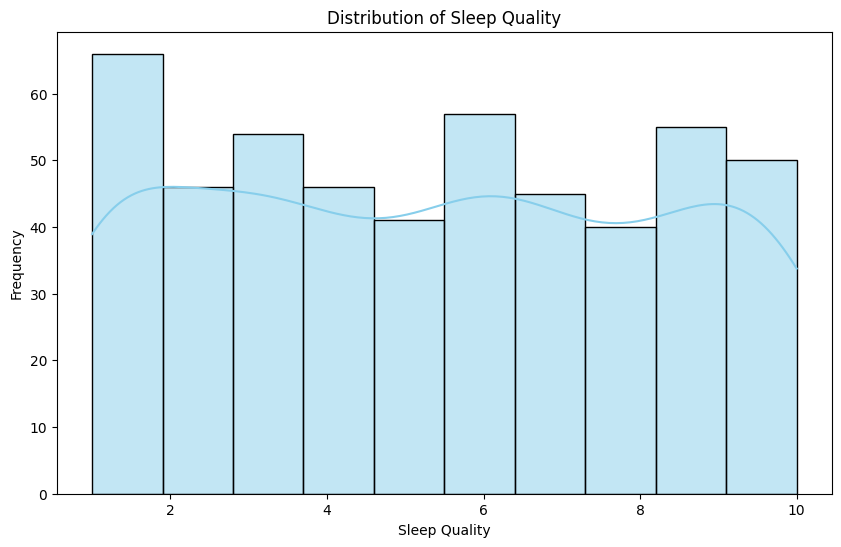

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Sleep_Quality'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of Sleep Quality')
plt.xlabel('Sleep Quality')
plt.ylabel('Frequency')
plt.show()

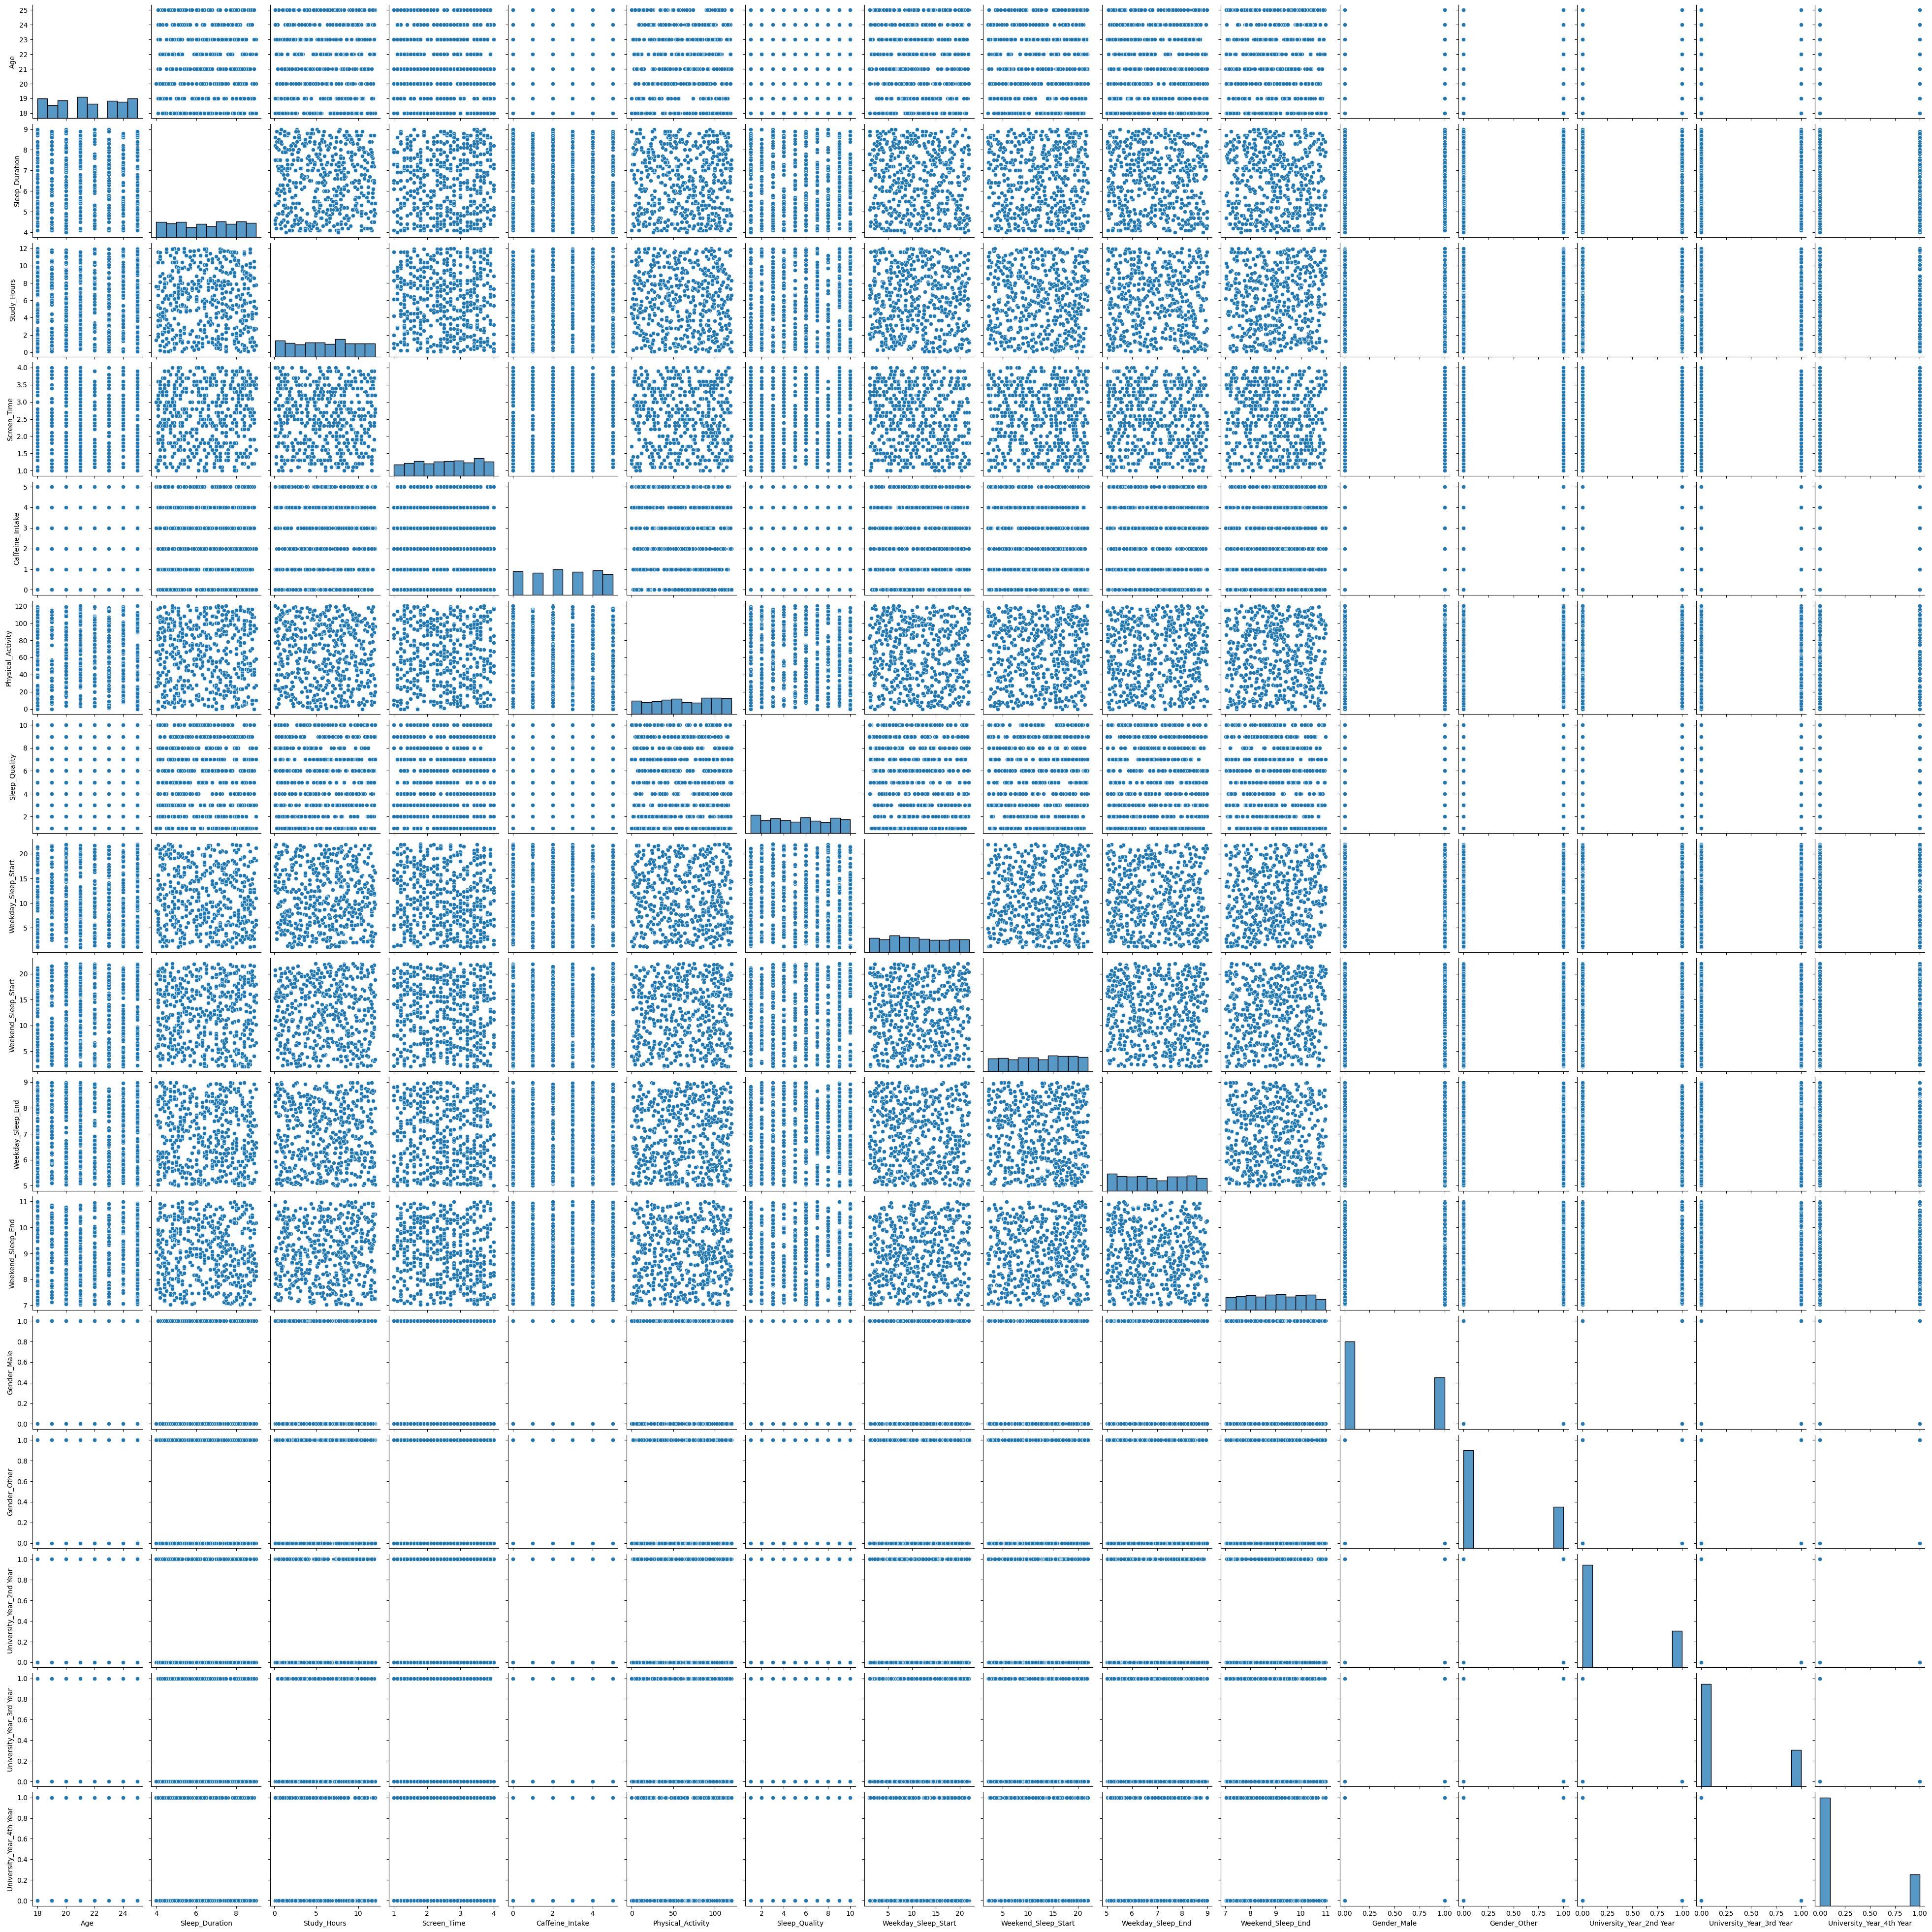

In [9]:
sns.pairplot(df)
plt.show()

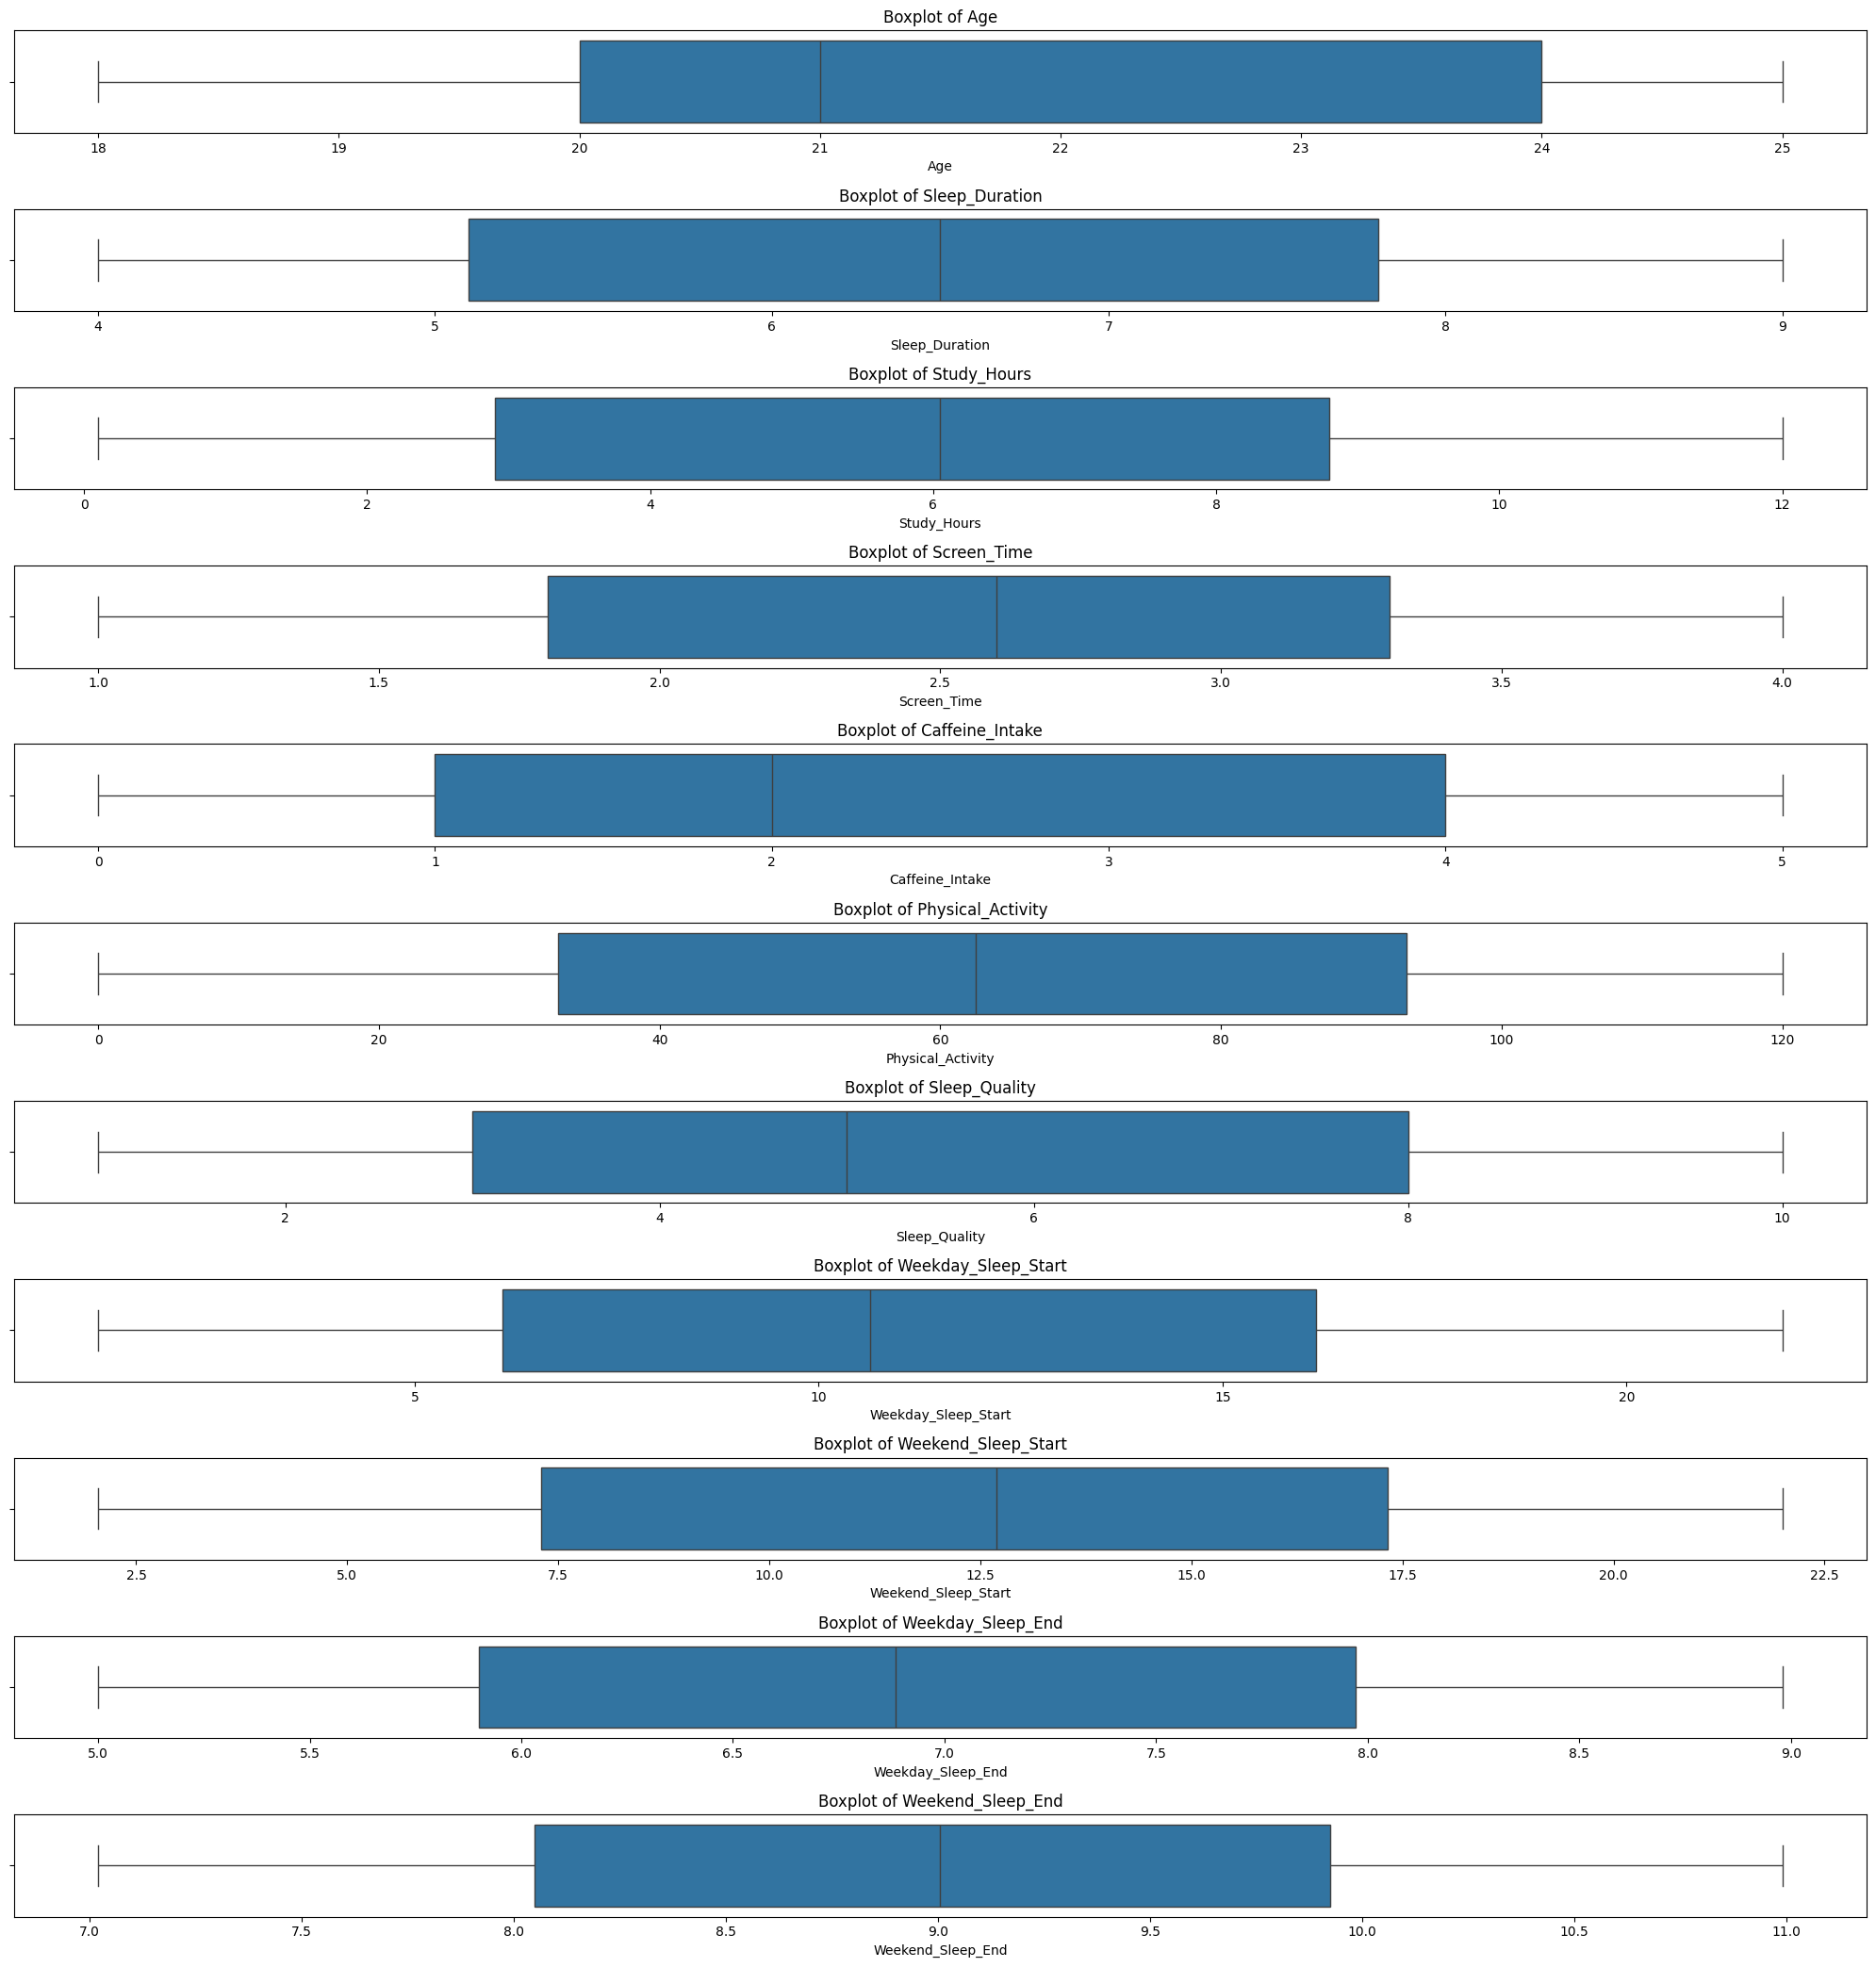

In [10]:
# Boxplots for all columns
plt.figure(figsize=(20, 30))
for i, column in enumerate(df.columns[:-5], 1):
    plt.subplot(len(df.columns), 1, i)
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column}")
    plt.tight_layout()
plt.show()

## Perform feature analysis and engineering

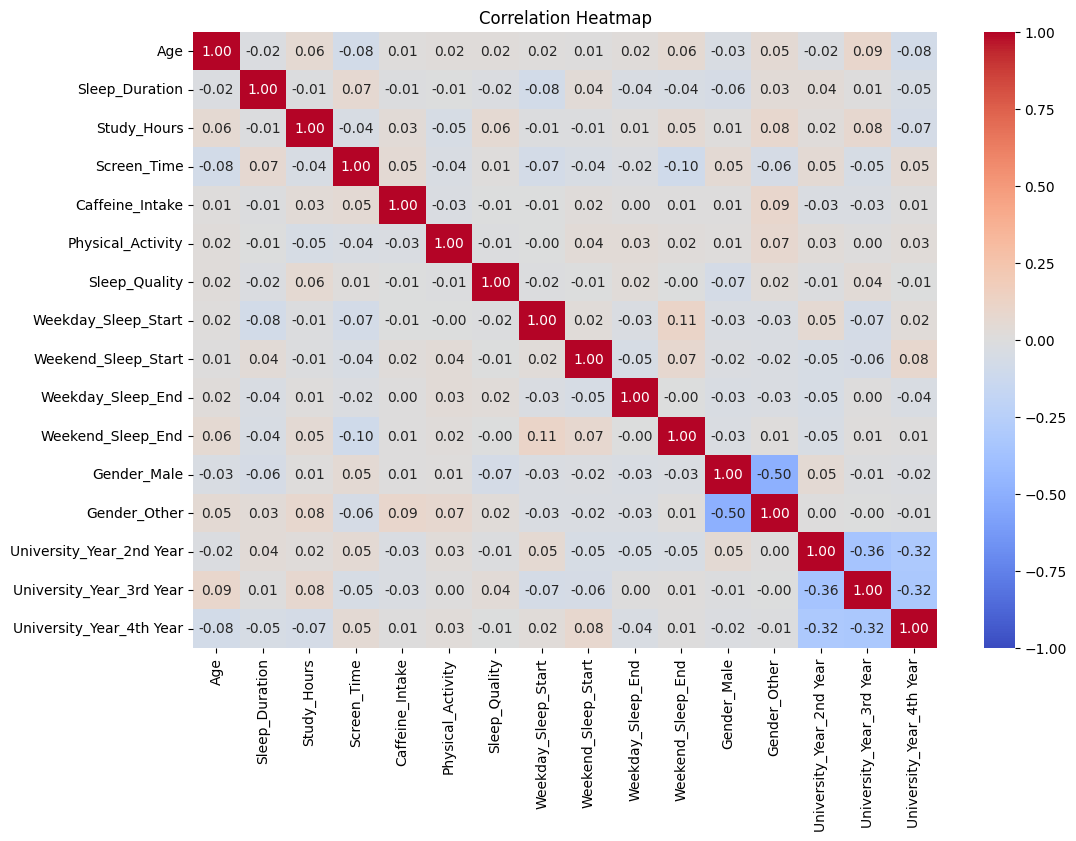

In [11]:
# Check multicollinearity
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

## Construct an ML model to predict Sleep_Quality

In [12]:
X = df.drop(columns=['Sleep_Quality'])
y = df['Sleep_Quality']
X

,Age,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End,Gender_Male,Gender_Other,University_Year_2nd Year,University_Year_3rd Year,University_Year_4th Year
0,24,7.7,7.9,3.4,2,37,14.16,4.05,7.41,7.06,False,True,True,False,False
1,21,6.3,6.0,1.9,5,74,8.73,7.10,8.21,10.21,True,False,False,False,False
2,22,5.1,6.7,3.9,5,53,20.00,20.47,6.88,10.92,True,False,False,False,True
3,24,6.3,8.6,2.8,4,55,19.82,4.08,6.69,9.42,False,True,False,False,True
4,20,4.7,2.7,2.7,0,85,20.98,6.12,8.98,9.01,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,24,5.1,9.3,1.9,4,110,17.42,8.43,6.93,10.78,True,False,True,False,False
496,20,8.9,7.7,3.5,3,40,1.22,15.54,5.85,7.23,True,False,True,False,False
497,21,5.7,6.4,3.9,1,68,9.94,2.25,5.46,10.72,True,False,False,True,False
498,18,4.9,0.5,3.5,0,12,19.10,15.49,8.35,7.20,False,False,True,False,False


In [13]:
y

0      10
1       2
2       5
3       9
4       3
       ..
495     4
496     4
497    10
498     2
499     1
Name: Sleep_Quality, Length: 500, dtype: int64

In [26]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Generate polynomial features
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Use Partial Least Squares (PLS) for dimensionality reduction
n_components = 7  # Number of components to retain
pls = PLSRegression(n_components=n_components)
X_reduced = pls.fit_transform(X_poly, y)[0]  # Reduced feature set

# Verify reduced dimensions
print(f"Original feature shape: {X_poly.shape}")
print(f"Reduced feature shape (using PLS): {X_reduced.shape}")

Original feature shape: (500, 815)
Reduced feature shape (using PLS): (500, 7)


In [27]:
pd.DataFrame(X_reduced)

,0,1,2,3,4,5,6
0,0.818817,-1.556279,0.412608,0.630929,3.514931,-2.750233,3.369579
1,-0.928805,-0.287716,0.499403,-0.483803,-1.981129,-2.735257,0.112009
2,-1.646160,3.691330,1.190273,7.166753,-6.510603,-3.607284,-1.106265
3,3.969697,1.346097,0.626855,3.900375,0.163289,2.440019,1.304712
4,-6.799488,-0.042865,-0.005907,3.651340,-1.131320,1.755971,-0.796283
...,...,...,...,...,...,...,...
495,-1.067260,0.707321,1.009495,1.738243,5.514126,-0.220615,2.454440
496,-1.932242,3.156705,3.902438,-4.733394,2.680488,0.054661,5.277060
497,2.307272,2.541880,-0.041796,-0.749145,1.683887,0.938036,-0.712505
498,-4.442452,2.474868,0.616432,-1.072360,4.307821,-1.221368,-1.907466


In [28]:
# Parameters for fine-tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_reduced, y)

print("Best Parameters from Grid Search:\n", grid_search.best_params_)

Best Parameters from Grid Search:
 {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [29]:
print(f"Best R^2 score: {grid_search.best_score_}")

Best R^2 score: 0.6614533959443595


In [30]:
grid_search.cv_results_

{'mean_fit_time': array([0.33617043, 0.60700712, 1.05235653, 0.25078683, 0.5589973 ,
        1.03501949, 0.25170197, 0.47576356, 1.13679233, 0.30030608,
        0.52762723, 1.05831308, 0.25458007, 0.49811864, 1.03150854,
        0.23893323, 0.46902928, 0.89824471, 0.27401052, 0.53484077,
        1.0416554 , 0.2510426 , 0.50171704, 0.98459568, 0.22519045,
        0.46708188, 0.90679908, 0.26174536, 0.5518836 , 1.06251726,
        0.25585632, 0.49790874, 1.016821  , 0.23585534, 0.45911074,
        0.95976825]),
 'std_fit_time': array([0.01438244, 0.04046499, 0.02459689, 0.00629907, 0.0569336 ,
        0.05133025, 0.01828938, 0.03020739, 0.13100176, 0.03741587,
        0.0205681 , 0.03307065, 0.01630606, 0.01454784, 0.01822354,
        0.01171678, 0.01056523, 0.00701888, 0.0242741 , 0.02337971,
        0.01287522, 0.01111382, 0.00816283, 0.01126511, 0.00387383,
        0.02758312, 0.00899775, 0.00891491, 0.02809515, 0.01207911,
        0.00605938, 0.00634168, 0.01606612, 0.00885174, 0.012

In [31]:
# Get the polynomial feature names
poly_feature_names = poly.get_feature_names_out(X.columns)

# Get the PLS coefficients for each feature
pls_coefficients = pls.coef_

# Since we have one component, we can flatten the coefficients to a 1D array
pls_coefficients_flat = pls_coefficients.flatten()

# Create a DataFrame for easy interpretation
importance_df = pd.DataFrame({
    'Feature': poly_feature_names,
    'Coefficient': pls_coefficients_flat
})

# Sort by the absolute value of coefficients to find the most important features
importance_df['Abs_Coefficient'] = importance_df['Coefficient'].abs()
importance_df_sorted = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Print the top 10 most important features
print(importance_df_sorted.head(n_components))

                                               Feature  Coefficient  \
30                                    Sleep_Duration^2    -0.408631   
581           Caffeine_Intake Gender_Male Gender_Other    -0.384567   
420  Study_Hours Weekend_Sleep_Start University_Yea...    -0.302683   
434  Study_Hours Weekend_Sleep_End University_Year_...     0.291133   
593  Caffeine_Intake University_Year_3rd Year Unive...    -0.284811   
15                                               Age^2     0.273343   
632  Physical_Activity Weekend_Sleep_End University...    -0.269451   

     Abs_Coefficient  
30          0.408631  
581         0.384567  
420         0.302683  
434         0.291133  
593         0.284811  
15          0.273343  
632         0.269451  
